# Analyze Categories of the Data with Groupby

- Use [this CheatSheet](https://www.craft.do/s/G80r1dqrQKrjTb/b/6FC991B6-1161-4F88-A315-3E84528A1950/groupby()-Categorical-Columns-to-Sum) to work better with the following exercises.

## 1 Categorical & 1 Numerical

### Tips Dataset

In which `day` do people spend more `money` in the restaurant?

- Every row represents a table in the restaurant
- Every column represents characteristics of the tables

In [ ]:
[

In [ ]:
[]

In [16]:
df_tips[]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
import seaborn as sns

In [18]:
import seaborn as sns

df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [19]:
type(df_tips)

pandas.core.frame.DataFrame

In [20]:
df_tips.groupby('day', observed=False).total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [21]:
df_tips.groupby('day').total_bill.mean().reset_index()

/tmp/ipykernel_26536/2061885738.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


#### Plot

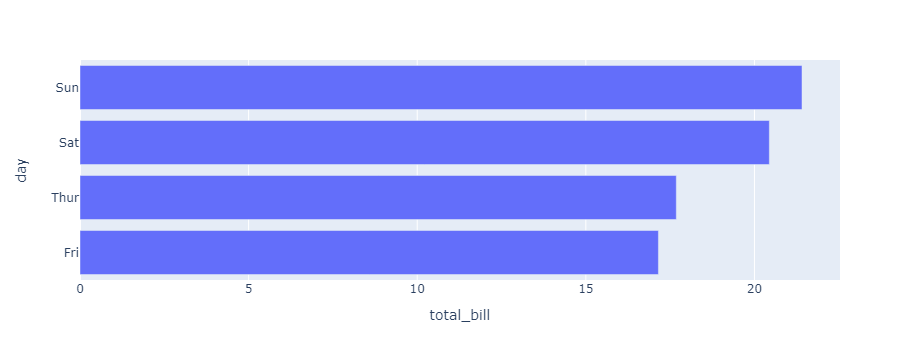

In [22]:
import plotly.express as px

px.bar(data_frame=dff, y='day', x='total_bill')

### Titanic Dataset

Who was `older`: people who `survived`, or those who didn't?
- Every row represents a person in the titanic
- Every column represts characteristics of the people

In [23]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [24]:
dff = df_titanic.groupby('alive').age.mean().reset_index()

In [25]:
dff

,alive,age
0,no,30.626179
1,yes,28.343690


#### Plot

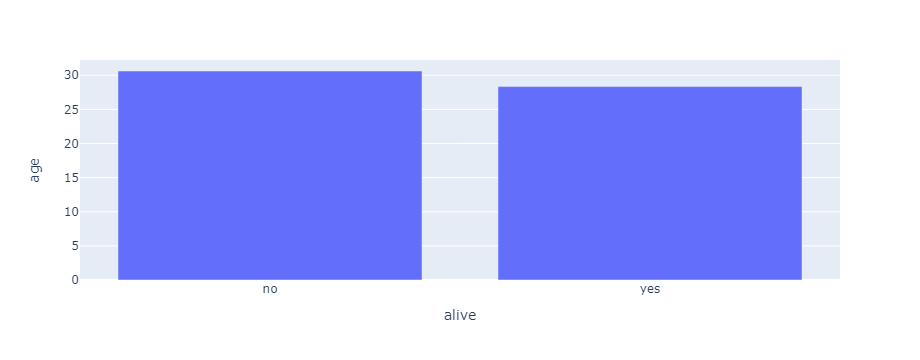

In [26]:
px.bar(data_frame=dff, x='alive', y='age')

## 2 Categorical & 1 Numerical

### Tips Dataset

When do people spend more `money` in the restaurant based on the `day` and the `time`?

In [27]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [28]:
dff = df_tips.groupby(['day', 'time']).total_bill.mean().sort_values().reset_index()

/tmp/ipykernel_26536/2208043406.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:
dff

,day,time,total_bill
0,Fri,Lunch,12.845714
1,Thur,Lunch,17.664754
2,Thur,Dinner,18.780000
3,Fri,Dinner,19.663333
4,Sat,Dinner,20.441379
5,Sun,Dinner,21.410000
6,Sat,Lunch,NaN
7,Sun,Lunch,NaN


#### Plot

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



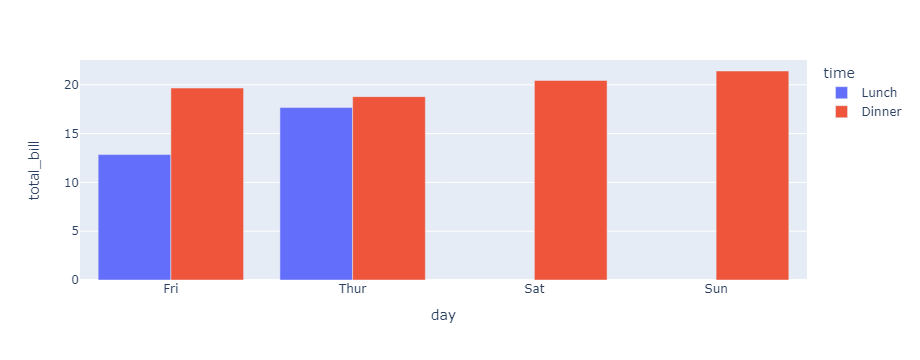

In [30]:
px.bar(data_frame=dff, x='day', y='total_bill', color='time', barmode='group')

### Titanic Dataset

Were `females` who survived `older` than males who `survived`?

In [31]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [32]:
dff = df_titanic.groupby(['sex', 'alive']).age.mean().sort_values().reset_index()

In [33]:
dff

,sex,alive,age
0,female,no,25.046875
1,male,yes,27.276022
2,female,yes,28.847716
3,male,no,31.618056


#### Plot

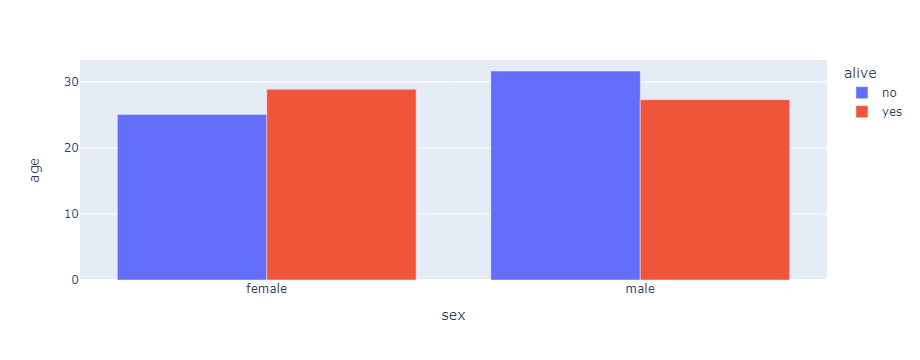

In [34]:
px.bar(data_frame=dff, x='sex', y='age', color='alive', barmode='group')

## 3 Categorical & 1 Numerical

### Tips Dataset

When do people give more `tip` in the restaurant based on the `day`, `time` and `sex`?

In [35]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [40]:
dff = df_tips.groupby(['day', 'time', 'sex'], observed=False).tip.mean().sort_values().reset_index()

In [46]:
dff = df_tips.groupby(['day', 'time', 'sex'], observed=True).tip.mean().sort_values().reset_index().copy()

In [47]:
dff

,day,time,sex,tip
0,Fri,Lunch,Male,1.900000
1,Thur,Lunch,Female,2.561935
2,Fri,Lunch,Female,2.745000
3,Sat,Dinner,Female,2.801786
4,Fri,Dinner,Female,2.810000
5,Thur,Lunch,Male,2.980333
6,Thur,Dinner,Female,3.000000
7,Fri,Dinner,Male,3.032857
8,Sat,Dinner,Male,3.083898
9,Sun,Dinner,Male,3.220345


#### Plot

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



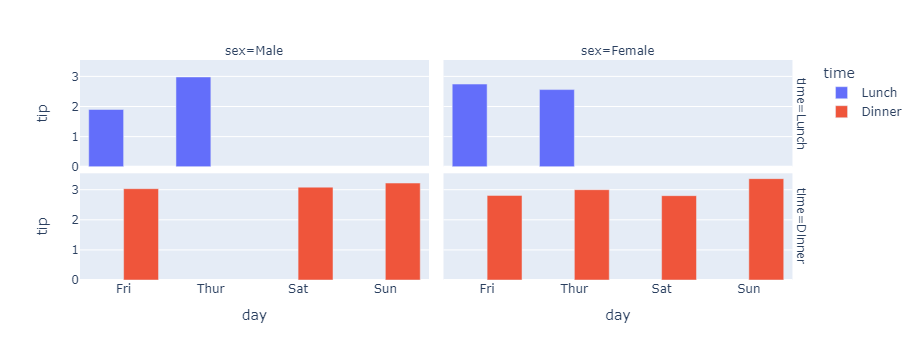

In [48]:
px.bar(data_frame=dff, x='day', y='tip', facet_row='time',
       color='time', barmode='group', facet_col='sex')

### Titanic Dataset

Were `females` who survived in first `class` `older` than males who `survived`?

In [49]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [50]:
dff = df_titanic.groupby(['sex', 'class', 'alive']).age.mean().sort_values().reset_index()

/tmp/ipykernel_26536/1329131069.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [51]:
dff

,sex,class,alive,age
0,male,Second,yes,16.022000
1,female,Third,yes,19.329787
2,male,Third,yes,22.274211
3,female,Third,no,23.818182
4,female,First,no,25.666667
5,male,Third,no,27.255814
6,female,Second,yes,28.080882
7,male,Second,no,33.369048
8,female,First,yes,34.939024
9,female,Second,no,36.000000


#### Plot

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



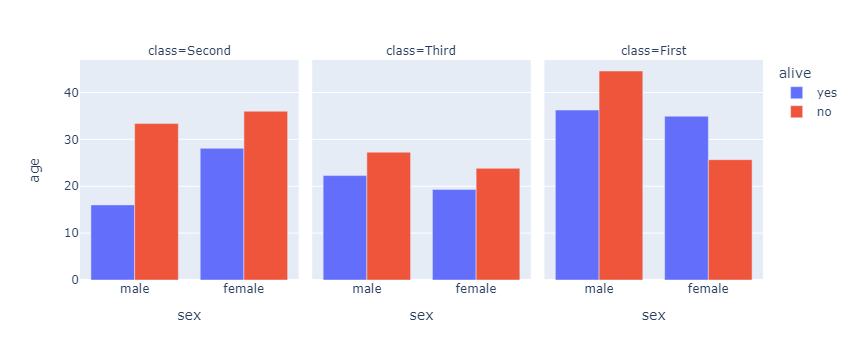

In [52]:
px.bar(data_frame=dff, x='sex', y='age', color='alive', barmode='group', facet_col='class')

## 1 Categorical

This time, you need to count the `size()` based on the repetitions of each group within the column.

If you get lost, Google: "pandas dataframe count values in column"

### Tips Dataset

In which day of the week had the restaurant more tables occupied?

In [60]:
df_tips.groupby('day').size()

/tmp/ipykernel_26536/3205101814.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [64]:
px

<module 'plotly.express' from '/home/codespace/.local/lib/python3.10/site-packages/plotly/express/__init__.py'>

In [65]:
df_tips.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [67]:
df_tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [ ]:
df

In [66]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [70]:
df = sns.load_dataset('titanic')

In [ ]:
- librerias
    - funciones
        - parametros

In [ ]:
- variables
    - objetos

df = pd.

- la programacion no es mas que transformar un objeto en otro a traves de una funcion

In [72]:
df.groupby(by='sex')

In [75]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [74]:
df.groupby(by='sex').survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [83]:
df.groupby(by='sex').alive.sum().reset_index()

,sex,alive
0,female,yesyesyesyesyesyesyesnoyesnoyesyesnoyesyesyesy...
1,male,nonononononononoyesnoyesyesnononononononoyesno...


In [88]:
cols = ['sex',	
'smoker',	
'day',	
'time',
]

In [91]:
df_tips.pivot_table(values='total_bill', index='sex', columns='time', aggfunc='sum')

time,Lunch,Dinner
sex,,
Male,595.60,2661.22
Female,571.87,999.08


In [94]:
df_tips.pivot_table(values='total_bill', index=['sex', 'smoker'], columns='time', aggfunc=['sum', 'mean'])

sum                mean           
time            Lunch   Dinner      Lunch     Dinner
sex    smoker                                       
Male   Yes     225.87  1111.20  17.374615  23.642553
       No      369.73  1550.02  18.486500  20.130130
Female Yes     174.31   418.96  17.431000  18.215652
       No      397.56   580.12  15.902400  20.004138

In [92]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [89]:
df_tips.groupby(cols).sum()

/tmp/ipykernel_26536/430518300.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



total_bill     tip  size
sex    smoker day  time                            
Male   Yes    Thur Lunch       191.71   30.58    23
                   Dinner        0.00    0.00     0
              Fri  Lunch        34.16    5.70     5
                   Dinner      129.46   16.23    12
              Sat  Lunch         0.00    0.00     0
                   Dinner      589.62   77.74    71
              Sun  Lunch         0.00    0.00     0
                   Dinner      392.12   52.82    39
       No     Thur Lunch       369.73   58.83    50
                   Dinner        0.00    0.00     0
              Fri  Lunch         0.00    0.00     0
                   Dinner       34.95    5.00     4
              Sat  Lunch         0.00    0.00     0
                   Dinner      637.73  104.21    85
              Sun  Lunch         0.00    0.00     0
                   Dinner      877.34  133.96   124
Female Yes    Thur Lunch       134.53   20.93    17
                   Dinner        0.00    0.00     0
              Fri  Lunch        39.78    7.98     6
                   Dinner       48.80   10.80     8
              Sat  Lunch         0.00    0.00     0
                   Dinner      304.00   43.03    33
              Sun  Lunch         0.00    0.00     0
                   Dinner       66.16   14.00    10
       No     Thur Lunch       381.58   58.49    60
                   Dinner       18.78    3.00     2
              Fri  Lunch        15.98    3.00     3
                   Dinner       22.75    3.25     2
              Sat  Lunch         0.00    0.00     0
                   Dinner      247.05   35.42    30
              Sun  Lunch         0.00    0.00     0
                   Dinner      291.54   46.61    43

In [84]:
df.groupby(by='sex').sum()

TypeError: category type does not support sum operations

In [76]:
df.groupby(by='sex').survived.sum().reset_index()

,sex,survived
0,female,233
1,male,109


In [79]:
df_tips.size

1708

In [81]:
df_tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [77]:
df_tips.groupby('day')

/tmp/ipykernel_26536/2624657082.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Data Manipulation

In [54]:
dff = df_tips.groupby('day').size().reset_index(name='freq')

/tmp/ipykernel_26536/973767859.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [55]:
dff

,day,freq
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


#### Plot

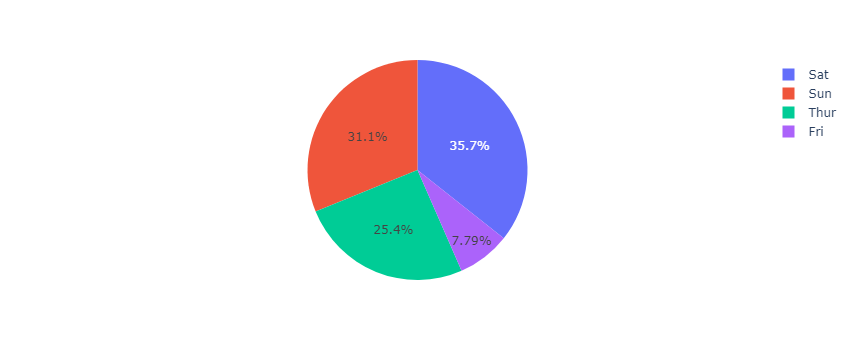

In [56]:
px.pie(data_frame=dff, names='day', values='freq')

### Titanic Dataset

How many people did survive the Titanic?

In [31]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


#### Data Manipulation

In [33]:
dff = df_titanic.groupby('survived').size().reset_index(name='freq')

#### Plot

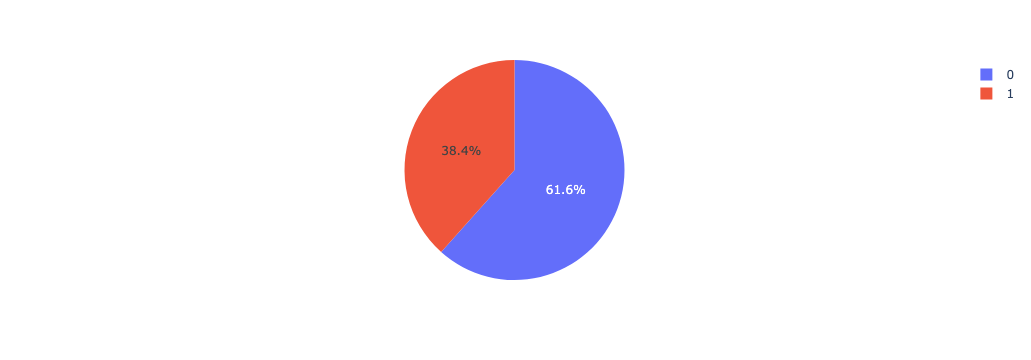

In [34]:
px.pie(data_frame=dff, names='survived', values='freq')